In [1]:
# importing libaries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden


In [3]:
# Toy problem data
input_size = 256  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 256  
sequence_length = 160  # number of sequences/ number of rows
batch_size = 1
num_epochs = 30000

In [4]:
# Load the .mat file
v_data = scipy.io.loadmat('v.mat')
h_data = scipy.io.loadmat('h.mat')
x_data = scipy.io.loadmat('x.mat')


In [5]:
x = x_data['X']
u = h_data['h']
u.shape

(201, 256)

In [6]:
# Set random seed for reproducibility
torch.manual_seed(40)

In [7]:
input_data = u[0:160,:]
target_data = u[1:161, :]

test_data = u[160, :]
#test_target = u[161:201, :]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (256,)
input data shape (160, 256)
Target data shape (160, 256)


In [8]:
# Convert data to tensors
input_tensor = torch.tensor(input_data).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 160, 256])
Target tensor shape torch.Size([1, 160, 256])


In [9]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target).view(batch_size, 40, output_size).float()


In [10]:
# Create RNN instance
rnn = RNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = rnn(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch: 10/30000, Loss: 0.0895
Epoch: 20/30000, Loss: 0.0452
Epoch: 30/30000, Loss: 0.0159
Epoch: 40/30000, Loss: 0.0076
Epoch: 50/30000, Loss: 0.0037
Epoch: 60/30000, Loss: 0.0019
Epoch: 70/30000, Loss: 0.0013
Epoch: 80/30000, Loss: 0.0009
Epoch: 90/30000, Loss: 0.0008
Epoch: 100/30000, Loss: 0.0007
Epoch: 110/30000, Loss: 0.0006
Epoch: 120/30000, Loss: 0.0006
Epoch: 130/30000, Loss: 0.0005
Epoch: 140/30000, Loss: 0.0005
Epoch: 150/30000, Loss: 0.0005
Epoch: 160/30000, Loss: 0.0005
Epoch: 170/30000, Loss: 0.0004
Epoch: 180/30000, Loss: 0.0005
Epoch: 190/30000, Loss: 0.0008
Epoch: 200/30000, Loss: 0.0004
Epoch: 210/30000, Loss: 0.0004
Epoch: 220/30000, Loss: 0.0004
Epoch: 230/30000, Loss: 0.0003
Epoch: 240/30000, Loss: 0.0003
Epoch: 250/30000, Loss: 0.0003
Epoch: 260/30000, Loss: 0.0002
Epoch: 270/30000, Loss: 0.0002
Epoch: 280/30000, Loss: 0.0002
Epoch: 290/30000, Loss: 0.0002
Epoch: 300/30000, Loss: 0.0002
Epoch: 310/30000, Loss: 0.0002
Epoch: 320/30000, Loss: 0.0002
Epoch: 330/30000,

Epoch: 2630/30000, Loss: 0.0000
Epoch: 2640/30000, Loss: 0.0000
Epoch: 2650/30000, Loss: 0.0001
Epoch: 2660/30000, Loss: 0.0001
Epoch: 2670/30000, Loss: 0.0001
Epoch: 2680/30000, Loss: 0.0000
Epoch: 2690/30000, Loss: 0.0000
Epoch: 2700/30000, Loss: 0.0000
Epoch: 2710/30000, Loss: 0.0000
Epoch: 2720/30000, Loss: 0.0000
Epoch: 2730/30000, Loss: 0.0003
Epoch: 2740/30000, Loss: 0.0009
Epoch: 2750/30000, Loss: 0.0005
Epoch: 2760/30000, Loss: 0.0001
Epoch: 2770/30000, Loss: 0.0001
Epoch: 2780/30000, Loss: 0.0000
Epoch: 2790/30000, Loss: 0.0000
Epoch: 2800/30000, Loss: 0.0000
Epoch: 2810/30000, Loss: 0.0000
Epoch: 2820/30000, Loss: 0.0000
Epoch: 2830/30000, Loss: 0.0000
Epoch: 2840/30000, Loss: 0.0000
Epoch: 2850/30000, Loss: 0.0006
Epoch: 2860/30000, Loss: 0.0001
Epoch: 2870/30000, Loss: 0.0000
Epoch: 2880/30000, Loss: 0.0000
Epoch: 2890/30000, Loss: 0.0000
Epoch: 2900/30000, Loss: 0.0000
Epoch: 2910/30000, Loss: 0.0000
Epoch: 2920/30000, Loss: 0.0000
Epoch: 2930/30000, Loss: 0.0002
Epoch: 2

Epoch: 5220/30000, Loss: 0.0000
Epoch: 5230/30000, Loss: 0.0000
Epoch: 5240/30000, Loss: 0.0000
Epoch: 5250/30000, Loss: 0.0000
Epoch: 5260/30000, Loss: 0.0000
Epoch: 5270/30000, Loss: 0.0000
Epoch: 5280/30000, Loss: 0.0001
Epoch: 5290/30000, Loss: 0.0001
Epoch: 5300/30000, Loss: 0.0000
Epoch: 5310/30000, Loss: 0.0000
Epoch: 5320/30000, Loss: 0.0000
Epoch: 5330/30000, Loss: 0.0000
Epoch: 5340/30000, Loss: 0.0000
Epoch: 5350/30000, Loss: 0.0003
Epoch: 5360/30000, Loss: 0.0001
Epoch: 5370/30000, Loss: 0.0003
Epoch: 5380/30000, Loss: 0.0001
Epoch: 5390/30000, Loss: 0.0000
Epoch: 5400/30000, Loss: 0.0000
Epoch: 5410/30000, Loss: 0.0000
Epoch: 5420/30000, Loss: 0.0001
Epoch: 5430/30000, Loss: 0.0001
Epoch: 5440/30000, Loss: 0.0000
Epoch: 5450/30000, Loss: 0.0000
Epoch: 5460/30000, Loss: 0.0000
Epoch: 5470/30000, Loss: 0.0002
Epoch: 5480/30000, Loss: 0.0001
Epoch: 5490/30000, Loss: 0.0002
Epoch: 5500/30000, Loss: 0.0001
Epoch: 5510/30000, Loss: 0.0000
Epoch: 5520/30000, Loss: 0.0000
Epoch: 5

Epoch: 7800/30000, Loss: 0.0000
Epoch: 7810/30000, Loss: 0.0000
Epoch: 7820/30000, Loss: 0.0000
Epoch: 7830/30000, Loss: 0.0000
Epoch: 7840/30000, Loss: 0.0000
Epoch: 7850/30000, Loss: 0.0000
Epoch: 7860/30000, Loss: 0.0001
Epoch: 7870/30000, Loss: 0.0000
Epoch: 7880/30000, Loss: 0.0000
Epoch: 7890/30000, Loss: 0.0000
Epoch: 7900/30000, Loss: 0.0000
Epoch: 7910/30000, Loss: 0.0000
Epoch: 7920/30000, Loss: 0.0000
Epoch: 7930/30000, Loss: 0.0000
Epoch: 7940/30000, Loss: 0.0000
Epoch: 7950/30000, Loss: 0.0000
Epoch: 7960/30000, Loss: 0.0000
Epoch: 7970/30000, Loss: 0.0000
Epoch: 7980/30000, Loss: 0.0000
Epoch: 7990/30000, Loss: 0.0000
Epoch: 8000/30000, Loss: 0.0004
Epoch: 8010/30000, Loss: 0.0000
Epoch: 8020/30000, Loss: 0.0000
Epoch: 8030/30000, Loss: 0.0000
Epoch: 8040/30000, Loss: 0.0000
Epoch: 8050/30000, Loss: 0.0000
Epoch: 8060/30000, Loss: 0.0000
Epoch: 8070/30000, Loss: 0.0000
Epoch: 8080/30000, Loss: 0.0000
Epoch: 8090/30000, Loss: 0.0000
Epoch: 8100/30000, Loss: 0.0000
Epoch: 8

Epoch: 10360/30000, Loss: 0.0000
Epoch: 10370/30000, Loss: 0.0000
Epoch: 10380/30000, Loss: 0.0001
Epoch: 10390/30000, Loss: 0.0000
Epoch: 10400/30000, Loss: 0.0000
Epoch: 10410/30000, Loss: 0.0001
Epoch: 10420/30000, Loss: 0.0005
Epoch: 10430/30000, Loss: 0.0001
Epoch: 10440/30000, Loss: 0.0000
Epoch: 10450/30000, Loss: 0.0000
Epoch: 10460/30000, Loss: 0.0000
Epoch: 10470/30000, Loss: 0.0001
Epoch: 10480/30000, Loss: 0.0001
Epoch: 10490/30000, Loss: 0.0000
Epoch: 10500/30000, Loss: 0.0000
Epoch: 10510/30000, Loss: 0.0001
Epoch: 10520/30000, Loss: 0.0001
Epoch: 10530/30000, Loss: 0.0001
Epoch: 10540/30000, Loss: 0.0001
Epoch: 10550/30000, Loss: 0.0001
Epoch: 10560/30000, Loss: 0.0002
Epoch: 10570/30000, Loss: 0.0001
Epoch: 10580/30000, Loss: 0.0000
Epoch: 10590/30000, Loss: 0.0000
Epoch: 10600/30000, Loss: 0.0001
Epoch: 10610/30000, Loss: 0.0001
Epoch: 10620/30000, Loss: 0.0000
Epoch: 10630/30000, Loss: 0.0000
Epoch: 10640/30000, Loss: 0.0000
Epoch: 10650/30000, Loss: 0.0003
Epoch: 106

Epoch: 12860/30000, Loss: 0.0001
Epoch: 12870/30000, Loss: 0.0000
Epoch: 12880/30000, Loss: 0.0000
Epoch: 12890/30000, Loss: 0.0000
Epoch: 12900/30000, Loss: 0.0000
Epoch: 12910/30000, Loss: 0.0002
Epoch: 12920/30000, Loss: 0.0001
Epoch: 12930/30000, Loss: 0.0000
Epoch: 12940/30000, Loss: 0.0000
Epoch: 12950/30000, Loss: 0.0000
Epoch: 12960/30000, Loss: 0.0001
Epoch: 12970/30000, Loss: 0.0001
Epoch: 12980/30000, Loss: 0.0000
Epoch: 12990/30000, Loss: 0.0000
Epoch: 13000/30000, Loss: 0.0003
Epoch: 13010/30000, Loss: 0.0002
Epoch: 13020/30000, Loss: 0.0001
Epoch: 13030/30000, Loss: 0.0000
Epoch: 13040/30000, Loss: 0.0000
Epoch: 13050/30000, Loss: 0.0000
Epoch: 13060/30000, Loss: 0.0000
Epoch: 13070/30000, Loss: 0.0002
Epoch: 13080/30000, Loss: 0.0001
Epoch: 13090/30000, Loss: 0.0001
Epoch: 13100/30000, Loss: 0.0001
Epoch: 13110/30000, Loss: 0.0000
Epoch: 13120/30000, Loss: 0.0001
Epoch: 13130/30000, Loss: 0.0000
Epoch: 13140/30000, Loss: 0.0000
Epoch: 13150/30000, Loss: 0.0001
Epoch: 131

Epoch: 15370/30000, Loss: 0.0000
Epoch: 15380/30000, Loss: 0.0000
Epoch: 15390/30000, Loss: 0.0000
Epoch: 15400/30000, Loss: 0.0000
Epoch: 15410/30000, Loss: 0.0000
Epoch: 15420/30000, Loss: 0.0000
Epoch: 15430/30000, Loss: 0.0000
Epoch: 15440/30000, Loss: 0.0002
Epoch: 15450/30000, Loss: 0.0001
Epoch: 15460/30000, Loss: 0.0000
Epoch: 15470/30000, Loss: 0.0000
Epoch: 15480/30000, Loss: 0.0001
Epoch: 15490/30000, Loss: 0.0000
Epoch: 15500/30000, Loss: 0.0000
Epoch: 15510/30000, Loss: 0.0002
Epoch: 15520/30000, Loss: 0.0001
Epoch: 15530/30000, Loss: 0.0000
Epoch: 15540/30000, Loss: 0.0000
Epoch: 15550/30000, Loss: 0.0001
Epoch: 15560/30000, Loss: 0.0000
Epoch: 15570/30000, Loss: 0.0000
Epoch: 15580/30000, Loss: 0.0000
Epoch: 15590/30000, Loss: 0.0001
Epoch: 15600/30000, Loss: 0.0000
Epoch: 15610/30000, Loss: 0.0002
Epoch: 15620/30000, Loss: 0.0001
Epoch: 15630/30000, Loss: 0.0000
Epoch: 15640/30000, Loss: 0.0001
Epoch: 15650/30000, Loss: 0.0000
Epoch: 15660/30000, Loss: 0.0000
Epoch: 156

Epoch: 17870/30000, Loss: 0.0001
Epoch: 17880/30000, Loss: 0.0001
Epoch: 17890/30000, Loss: 0.0001
Epoch: 17900/30000, Loss: 0.0001
Epoch: 17910/30000, Loss: 0.0000
Epoch: 17920/30000, Loss: 0.0000
Epoch: 17930/30000, Loss: 0.0001
Epoch: 17940/30000, Loss: 0.0002
Epoch: 17950/30000, Loss: 0.0001
Epoch: 17960/30000, Loss: 0.0001
Epoch: 17970/30000, Loss: 0.0000
Epoch: 17980/30000, Loss: 0.0000
Epoch: 17990/30000, Loss: 0.0002
Epoch: 18000/30000, Loss: 0.0000
Epoch: 18010/30000, Loss: 0.0000
Epoch: 18020/30000, Loss: 0.0000
Epoch: 18030/30000, Loss: 0.0003
Epoch: 18040/30000, Loss: 0.0002
Epoch: 18050/30000, Loss: 0.0000
Epoch: 18060/30000, Loss: 0.0000
Epoch: 18070/30000, Loss: 0.0001
Epoch: 18080/30000, Loss: 0.0000
Epoch: 18090/30000, Loss: 0.0000
Epoch: 18100/30000, Loss: 0.0000
Epoch: 18110/30000, Loss: 0.0001
Epoch: 18120/30000, Loss: 0.0001
Epoch: 18130/30000, Loss: 0.0001
Epoch: 18140/30000, Loss: 0.0000
Epoch: 18150/30000, Loss: 0.0000
Epoch: 18160/30000, Loss: 0.0000
Epoch: 181

Epoch: 20360/30000, Loss: 0.0001
Epoch: 20370/30000, Loss: 0.0000
Epoch: 20380/30000, Loss: 0.0000
Epoch: 20390/30000, Loss: 0.0000
Epoch: 20400/30000, Loss: 0.0001
Epoch: 20410/30000, Loss: 0.0001
Epoch: 20420/30000, Loss: 0.0002
Epoch: 20430/30000, Loss: 0.0000
Epoch: 20440/30000, Loss: 0.0000
Epoch: 20450/30000, Loss: 0.0000
Epoch: 20460/30000, Loss: 0.0000
Epoch: 20470/30000, Loss: 0.0001
Epoch: 20480/30000, Loss: 0.0001
Epoch: 20490/30000, Loss: 0.0001
Epoch: 20500/30000, Loss: 0.0000
Epoch: 20510/30000, Loss: 0.0000
Epoch: 20520/30000, Loss: 0.0001
Epoch: 20530/30000, Loss: 0.0001
Epoch: 20540/30000, Loss: 0.0001
Epoch: 20550/30000, Loss: 0.0001
Epoch: 20560/30000, Loss: 0.0000
Epoch: 20570/30000, Loss: 0.0000
Epoch: 20580/30000, Loss: 0.0000
Epoch: 20590/30000, Loss: 0.0001
Epoch: 20600/30000, Loss: 0.0000
Epoch: 20610/30000, Loss: 0.0001
Epoch: 20620/30000, Loss: 0.0001
Epoch: 20630/30000, Loss: 0.0000
Epoch: 20640/30000, Loss: 0.0000
Epoch: 20650/30000, Loss: 0.0000
Epoch: 206

Epoch: 22850/30000, Loss: 0.0000
Epoch: 22860/30000, Loss: 0.0000
Epoch: 22870/30000, Loss: 0.0000
Epoch: 22880/30000, Loss: 0.0000
Epoch: 22890/30000, Loss: 0.0006
Epoch: 22900/30000, Loss: 0.0002
Epoch: 22910/30000, Loss: 0.0001
Epoch: 22920/30000, Loss: 0.0000
Epoch: 22930/30000, Loss: 0.0000
Epoch: 22940/30000, Loss: 0.0000
Epoch: 22950/30000, Loss: 0.0000
Epoch: 22960/30000, Loss: 0.0000
Epoch: 22970/30000, Loss: 0.0003
Epoch: 22980/30000, Loss: 0.0001
Epoch: 22990/30000, Loss: 0.0000
Epoch: 23000/30000, Loss: 0.0000
Epoch: 23010/30000, Loss: 0.0000
Epoch: 23020/30000, Loss: 0.0000
Epoch: 23030/30000, Loss: 0.0000
Epoch: 23040/30000, Loss: 0.0002
Epoch: 23050/30000, Loss: 0.0000
Epoch: 23060/30000, Loss: 0.0000
Epoch: 23070/30000, Loss: 0.0001
Epoch: 23080/30000, Loss: 0.0002
Epoch: 23090/30000, Loss: 0.0001
Epoch: 23100/30000, Loss: 0.0000
Epoch: 23110/30000, Loss: 0.0000
Epoch: 23120/30000, Loss: 0.0000
Epoch: 23130/30000, Loss: 0.0001
Epoch: 23140/30000, Loss: 0.0000
Epoch: 231

Epoch: 25350/30000, Loss: 0.0002
Epoch: 25360/30000, Loss: 0.0002
Epoch: 25370/30000, Loss: 0.0002
Epoch: 25380/30000, Loss: 0.0002
Epoch: 25390/30000, Loss: 0.0002
Epoch: 25400/30000, Loss: 0.0002
Epoch: 25410/30000, Loss: 0.0002
Epoch: 25420/30000, Loss: 0.0002
Epoch: 25430/30000, Loss: 0.0002
Epoch: 25440/30000, Loss: 0.0002
Epoch: 25450/30000, Loss: 0.0002
Epoch: 25460/30000, Loss: 0.0002
Epoch: 25470/30000, Loss: 0.0002
Epoch: 25480/30000, Loss: 0.0002
Epoch: 25490/30000, Loss: 0.0002
Epoch: 25500/30000, Loss: 0.0002
Epoch: 25510/30000, Loss: 0.0002
Epoch: 25520/30000, Loss: 0.0002
Epoch: 25530/30000, Loss: 0.0002
Epoch: 25540/30000, Loss: 0.0002
Epoch: 25550/30000, Loss: 0.0002
Epoch: 25560/30000, Loss: 0.0002
Epoch: 25570/30000, Loss: 0.0002
Epoch: 25580/30000, Loss: 0.0002
Epoch: 25590/30000, Loss: 0.0002
Epoch: 25600/30000, Loss: 0.0002
Epoch: 25610/30000, Loss: 0.0002
Epoch: 25620/30000, Loss: 0.0002
Epoch: 25630/30000, Loss: 0.0002
Epoch: 25640/30000, Loss: 0.0002
Epoch: 256

Epoch: 27850/30000, Loss: 0.0002
Epoch: 27860/30000, Loss: 0.0002
Epoch: 27870/30000, Loss: 0.0002
Epoch: 27880/30000, Loss: 0.0002
Epoch: 27890/30000, Loss: 0.0002
Epoch: 27900/30000, Loss: 0.0002
Epoch: 27910/30000, Loss: 0.0002
Epoch: 27920/30000, Loss: 0.0002
Epoch: 27930/30000, Loss: 0.0008
Epoch: 27940/30000, Loss: 0.0027
Epoch: 27950/30000, Loss: 0.0015
Epoch: 27960/30000, Loss: 0.0005
Epoch: 27970/30000, Loss: 0.0003
Epoch: 27980/30000, Loss: 0.0002
Epoch: 27990/30000, Loss: 0.0002
Epoch: 28000/30000, Loss: 0.0002
Epoch: 28010/30000, Loss: 0.0002
Epoch: 28020/30000, Loss: 0.0002
Epoch: 28030/30000, Loss: 0.0002
Epoch: 28040/30000, Loss: 0.0002
Epoch: 28050/30000, Loss: 0.0002
Epoch: 28060/30000, Loss: 0.0002
Epoch: 28070/30000, Loss: 0.0002
Epoch: 28080/30000, Loss: 0.0002
Epoch: 28090/30000, Loss: 0.0002
Epoch: 28100/30000, Loss: 0.0003
Epoch: 28110/30000, Loss: 0.0002
Epoch: 28120/30000, Loss: 0.0002
Epoch: 28130/30000, Loss: 0.0002
Epoch: 28140/30000, Loss: 0.0002
Epoch: 281

(1, 256)
(1, 201)
(201, 256)


/data/localhome/tkapoor/.local/lib/python3.8/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


<Figure size 432x288 with 0 Axes>

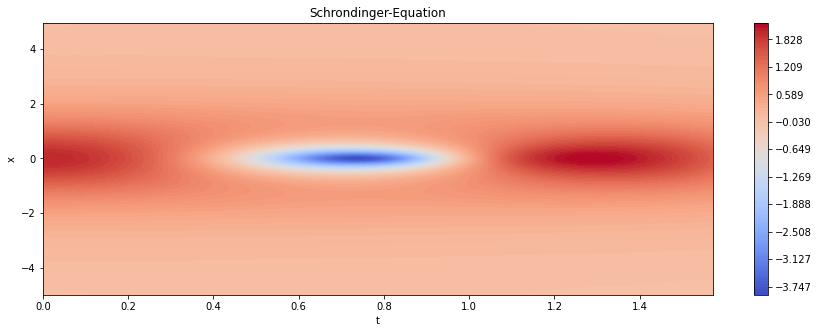

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('NLS.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['tt']
u1 = mat_data['uu']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u1), np.max(u1), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u1.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Schrondinger-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [12]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 40, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 40, 256])


In [13]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = rnn(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(39):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = rnn(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

In [14]:
# true solution
h_true = np.abs(u1)
h_true = h_true.T
print(h_true.shape)

(201, 256)


In [15]:
# exact
u_test_full = h_true[161:201, :]
print(u_test_full.shape)

(40, 256)


In [16]:

k1 = (prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
prediction_tensor.shape

torch.Size([1, 40, 256])

In [17]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.3170042136998299 %


In [18]:
R_abs = torch.max(prediction_tensor-u_test_full)
print(R_abs)

tensor(1.6950, dtype=torch.float64)


In [19]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())


Explained Variance Score: 0.4408047877985153


In [20]:
R_mean = torch.mean(torch.abs(prediction_tensor - u_test_full))
print(R_mean)

tensor(0.2601, dtype=torch.float64)


In [21]:
prediction_tensor = torch.squeeze(prediction_tensor)
h = np.abs(u1)
h.shape

(256, 201)

(256, 1)
(256, 1)


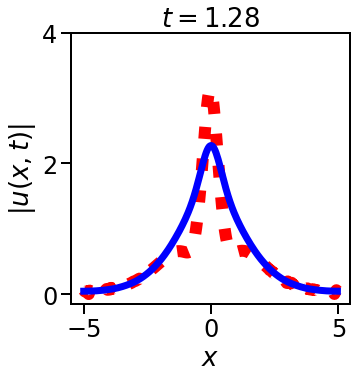

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)

final_time_output = prediction_tensor[-38, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = h[:, -38].reshape(-1, 1)
print(final_out.shape)
print(final_true.shape)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${|u(x, t)|}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 1.28}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 2, 4])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('RNN_1.28_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


(256, 1)
(256, 1)


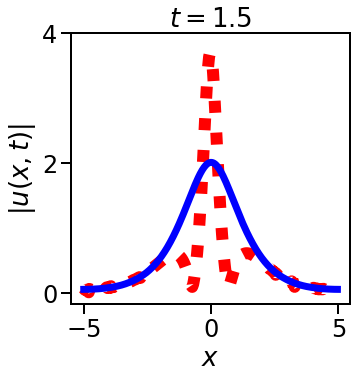

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)


final_time_output = prediction_tensor[-3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = h[:, -3].reshape(-1, 1)
print(final_out.shape)
print(final_true.shape)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${|u(x, t)|}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 1.5}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 2, 4])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('RNN_1.5_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


In [24]:
conc_u = torch.squeeze(input_tensor)

In [25]:
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

t1 = np.linspace(0, 1.5707 , 200)

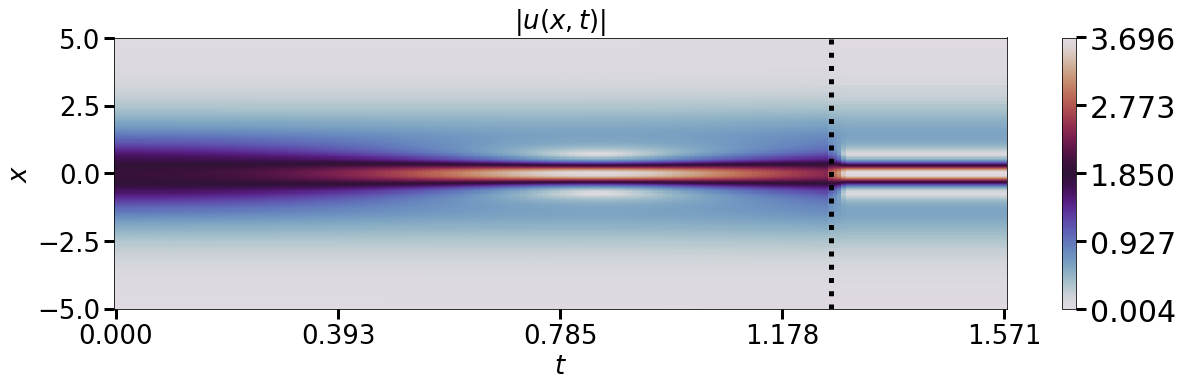

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-5, 5, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1.57, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$|u(x, t)|$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=1.26449, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_RNN_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
